# Cargar la base

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
base=pd.read_csv('/content/drive/MyDrive/base_formateada.csv')

<ipython-input-2-dc6dd172c19c>:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  base=pd.read_csv('/content/drive/MyDrive/base_formateada.csv')


In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])
stopwords.extend(['millón', 'euro', 'emitido', 'efectuada', 'dio', 'comienzo', 'partido', 'queda', 'quedan', 'rechazada', 'aceptada', 'comienza', 'usted', 'sabe', 'abstención', 'diputado', 'gobierno'])
stopwords.extend(['continuación', 'votamos', 'telemático', 'republicanaizquierda', 'unidainiciativa', 'puede', 'bien', 'propuesta' ,'abstencion', 'mayoría', 'absoluta', 'pregunta', 'don', 'vamos', 'votar', 'llevar', 'cabo', 'millón', 'muchas', 'gracias'])
stopwords.extend(['podemosen', 'podemen', 'ministro', 'ministra', 'ss', 'ruego', 'aprobado', 'aprobada'])
stopwords.extend(['diputado', 'diputada', 'don', 'doña', 'vicepresidenta', 'sagastizab', 'unzetabarrenetxea', 'agirretxea', 'urresti', 'escrutinio', 'dijo', 'dice', 'quevedo'])
stopwords.extend(['campuzano', 'beitialarrangoitia', 'gonzalezmoro', 'mixto'])

In [5]:
# Se incorporan los nombres de los oradores como stopwords
from collections import Counter
nombres=[]
for i in base.namey.unique().tolist(): nombres.extend(str(i).split(' '))
nombres = [x.strip(' ') for x in nombres]
nombres = [x.strip(' †') for x in nombres]
nombres = [x.strip(',') for x in nombres]
nombres=list(Counter(nombres))
nombres.remove('')

In [6]:
stopwords.extend(nombres)

In [7]:
partidos=pd.read_csv('/content/drive/MyDrive/partidos.csv', encoding='latin1', sep=';')

In [8]:
for x in partidos['nombre'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(str(a).split())
  stopwords.extend(a)

for x in partidos['1'].unique():
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

for x in partidos['2'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

for x in partidos['3'].unique(): 
  a=str(x).rstrip(' ')
  stopwords.extend(a.split())
  stopwords.extend(a)

In [9]:
len(stopwords)

4481

In [10]:
# elimino acentos de los tokens
a,b = 'áàéèíóúü','aaeeiouu'
trans = str.maketrans(a,b)
lista = []
for row in base.values:
    row[20]=row[20].translate(trans)
    lista.append(row)

base = pd.DataFrame(lista, columns=base.columns)

In [11]:
# llevo las stopwords a minúsculas y elimino acentos
stopwords=[x.lower() for x in stopwords if type(x)==str]
stopwords=[x.translate(trans) for x in stopwords if type(x)==str]

# Ordenes del día

In [12]:
# Hay 28mil órdenes del día únicas
len(base.orden.unique())

28566

In [13]:
# Para un total de 334mil discursos
len(base)

334421

In [14]:
# Este es el listado de las 40 ordenes del día con más discursos, y su número de discursos.
base['orden'].value_counts()[:40]

VOTACIONES:                                                                                                                                                                             939
DICTAMENES DE COMISION SOBRE INICIATIVAS LEGISLATIVAS:  — PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA 1989                                                                838
PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA 1983                                                                                                                          738
-- PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA 1998 (Número                                                                                                               738
DICTÁMENES DE COMISIONES SOBRE INICIATIVAS LEGISLATIVAS. -PROYECTO DE LEY DE PRESUPUESTOS GENERALES DEL ESTADO PARA EL AÑO 2006.                                                        701
DICTÁMENES DE COMISIONES SOBRE INICIATIVAS LEGISLATIVAS. (CO

<AxesSubplot:>

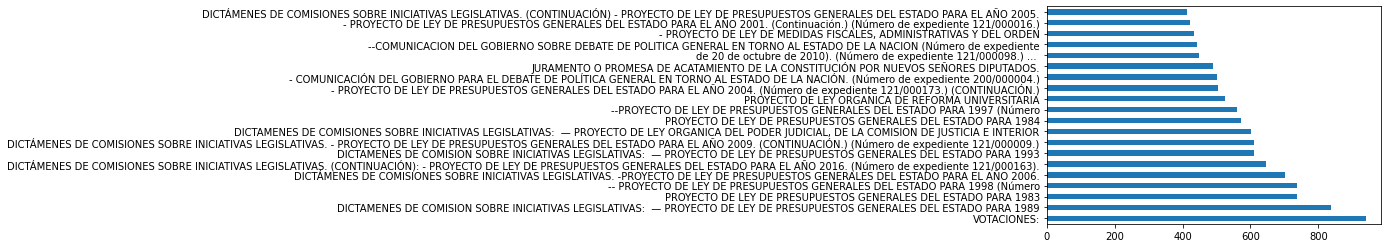

In [15]:
base['orden'].value_counts()[:20].plot(kind='barh')

In [16]:
import numpy as np

for e in (5,10, 25, 50, 80, 95):
  print(f"Percentil " +str(e)+ ": "+ str(np.percentile(base['orden'].value_counts(), e)))

Percentil 5: 2.0
Percentil 10: 2.0
Percentil 25: 5.0
Percentil 50: 7.0
Percentil 80: 14.0
Percentil 95: 30.0


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


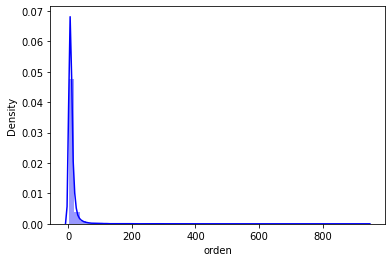

In [17]:
import seaborn
from scipy.stats import binom
ax=seaborn.distplot(base['orden'].value_counts(),
                kde=True,
                color='blue',
                hist_kws={"linewidth": 22})

In [18]:
# Se genera una base corta que contiene solo los discursos que pertenecen en alguna de las 100 ordenes del día más frecuentes
base_corta=base.loc[base['orden'].isin(base['orden'].value_counts()[:100].keys())]

In [19]:
# elimino acentos de las ordenes del día y las convierto a minúscula
a,b = 'áàéèíóúü','aaeeiouu'
trans = str.maketrans(a,b)
lista = []
for row in base.values:
    row[1]=str(row[1]).translate(trans)
    row[1]=row[1].lower()
    lista.append(row)

base = pd.DataFrame(lista, columns=base.columns)

# LDA sobre ordenes del día

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,1), stop_words=stopwords, max_df=0.995 , min_df=0.005)
bow_ordenes = vect.fit_transform(base['orden'])
lda = LatentDirichletAllocation(n_components=15, max_iter=50, learning_method='batch', learning_offset=50.,random_state=0)     
lda.fit(bow_ordenes)

LatentDirichletAllocation(learning_offset=50.0, max_iter=50, n_components=15,
                          random_state=0)

In [ ]:
bow_ordenes.shape

(334421, 477)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
# Topics by weights
display_topics(lda, feature_names=vect.get_feature_names_out(), no_top_words=20)

Topic 1:
numero , expediente , acuerdo , diciembre , 130 , hecho , convenio , reino , 110 , presupuestaria , noviembre , junio , modifica , mayo , abril , octubre , reforma , estabilidad , marzo , relativo
Topic 2:
nacional , judicial , poder , justicia , general , consejo , plan , 000 , control , tribunal , ejercicio , pesetas , cuentas , actividades , motivo , propuestas , 1985 , importe , millones , fondos
Topic 3:
presupuestos , generales , proyecto , numero , expediente , 121 , legislativas , iniciativas , comisiones , dictámenes , continuación , 1983 , 1984 , 2006 , 2010 , 000009 , 000013 , 2009 , votación , 2013
Topic 4:
numero , expediente , comparecencia , informar , pleno , cámara , reales , 210 , leyes , decretos , día , convalidación , derogación , petición , consejo , europeo , reglamento , 213 , propia , 130
Topic 5:
numero , expediente , congreso , 162 , 173 , 172 , relativa , catalán , unió , federal , convergència , medidas , política , proposiciones , creación , relac

In [ ]:
from numpy import argsort
import statistics
from statistics import mode
from scipy.special import logsumexp
import scipy as sp
     

def frex(mod, w=0.7):
    log_beta = np.log(mod.components_)
    log_exclusivity = log_beta - logsumexp(log_beta, axis=0)
    exclusivity_ecdf = np.apply_along_axis(ecdf, 1, log_exclusivity)
    freq_ecdf = np.apply_along_axis(ecdf, 1, log_beta)
    out = 1. / (w / exclusivity_ecdf + (1 - w) / freq_ecdf)
    return out

def ecdf(arr):
    return sp.stats.rankdata(arr, method='max') / arr.size
     

def display_topics_frex(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(frex(model)):
        print("Topic %d:" % (topic_idx + 1))
        print(" , ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
# Topics by frex
display_topics_frex(lda, feature_names=vect.get_feature_names_out(), no_top_words=20)

Topic 1:
presupuestaria , 110 , estabilidad , convenio , mayo , reino , abril , 26 , noviembre , diciembre , 24 , 17 , relativo , autonomía , 13 , 22 , octubre , 27 , acuerdo , 28
Topic 2:
judicial , nacional , pesetas , cuentas , importe , poder , motivo , ejercicio , control , fondos , actividades , 000 , tribunal , plan , millones , resolución , extraordinario , correspondiente , propuestas , justicia
Topic 3:
generales , dictámenes , presupuestos , 1983 , 1984 , continuación , comisiones , 000013 , 000009 , 2006 , 121 , 2010 , 2009 , legislativas , 2015 , 2013 , 1998 , iniciativas , 1997 , 2003
Topic 4:
cámara , convalidación , derogación , 210 , informar , días , decretos , reales , 203 , día , conformidad , pleno , adoptan , petición , celebrado , comparecencia , 213 , leyes , 062 , dispuesto
Topic 5:
catalán , unió , 172 , 162 , convergència , relativa , 173 , creación , federal , políticas , insta , posición , política , unión , investigación , situación , relación , impulsar ,

# A mano

In [20]:
base.shape

(334421, 21)

In [21]:
'convenio' in 'convenio hispano chileno de  seguridad social entre el gobier no de la republica de chile y el gobierno de españa'

True

In [84]:
base['reglas y procedemientos']=0
base['Administración']=0
base['Economía']=0
base['Energía']=0
base['Seguridad']=0
base['Política Laboral']=0
base['Transporte']=0
base['Comunicaciones']=0
base['Social']=0
base['Educación']=0
base['Seguridad Social']=0
base['Justicia']=0
base['Internacionales']=0
base['Política Interna']=0
base['Otros']=0

lista=[]
for row in base.values:
  
  # Reglas y Procedimientos
    if 'dictamen' in row[1]: row[21]=1
    if 'designacion' in row[1]: row[21]=1
    if 'decreto' in row[1]: row[21]=1
    if 'ley' in row[1]: row[21]=1
    if 'constitucion' in row[1]: row[21]=1
    if 'decisiones' in row[1]: row[21]=1
    if 'orden' in row[1]: row[21]=1
    if 'votacion' in row[1]: row[21]=1
    if 'intervencion' in row[1]: row[21]=1
    if 'nuevo gobierno' in row[1]: row[21]=1
    if 'resolucion' in row[1]: row[21]=1
    if 'modificacion' in row[1]: row[21]=1
    if 'comision' in row[1]: row[21]=1
    if 'comisión' in row[1]: row[21]=1
    if 'comi sion' in row[1]: row[21]=1
    if 'parlamentario' in row[1]: row[21]=1
    if 'presidencia' in row[1]: row[21]=1
    if 'presupuestos generales' in row[1]: row[21]=1
    if 'comunicacion del gobierno' in row[1]: row[21]=1
    if 'referendum' in row[1]: row[21]=1
    if 'eleccion' in row[1]: row[21]=1
    if 'miembros de la mesa' in row[1]: row[21]=1
    if 'diputa' in row[1]: row[21]=1
    if 'institucional' in row[1]: row[21]=1
    if 'legislativ' in row[1]: row[21]=1
    if 'mocion de censura' in row[1]: row[21]=1
    if 'constitución' in row[1]: row[21]=1
    if 'juramento' in row[1]: row[21]=1
    if 'extraordinaria' in row[1]: row[21]=1
    if 'extraorinaria' in row[1]: row[21]=1
    if 'votación de conjunto' in row[1]: row[21]=1
    if 'reglamento del congreso' in row[1]: row[21]=1
    if 'prórroga de plazo' in row[1]: row[21]=1
    if 'autoprotección de la cámara' in row[1]: row[21]=1
    if 'avocación por el pleno' in row[1]: row[21]=1
    if 'minuto de silencio' in row[1]: row[21]=1
    if 'prórrogas de plazo' in row[1]: row[21]=1
    if 'exclusión de los puntos' in row[1]: row[21]=1
    if 'canje de notas' in row[1]: row[21]=1
    if 'tramitación directa y en lectura única' in row[1]: row[21]=1
    if 'votación final' in row[1]: row[21]=1
    

  # Administración
    if 'gobierno' in row[1]: row[22]=1
    if 'administra' in row[1]: row[22]=1
    if 'funcionarios' in row[1]: row[22]=1
    if 'acuerdo' in row[1]: row[22]=1
    if 'ejecutivo' in row[1]: row[22]=1
    if 'publica' in row[1]: row[22]=1
    if 'minist' in row[1]: row[22]=1
    if 'el rey' in row[1]: row[22]=1
    if 'president' in row[1]: row[22]=1
    if 'secretari' in row[1]: row[22]=1
  
  # Economía
    if 'economi' in row[1]: row[23]=1
    if 'empresa' in row[1]: row[23]=1
    if 'desequilibrios territoriales' in row[1]: row[23]=1
    if 'presupuesto' in row[1]: row[23]=1
    if 'industria' in row[1]: row[23]=1
    if 'agricultura' in row[1]: row[23]=1
    if 'import' in row[1]: row[23]=1
    if 'export' in row[1]: row[23]=1
    if 'miner' in row[1]: row[23]=1
    if 'olivare' in row[1]: row[23]=1
    if 'pesca' in row[1]: row[23]=1
    if 'garbanzo' in row[1]: row[23]=1
    if 'sector' in row[1]: row[23]=1
    if 'precio' in row[1]: row[23]=1
    if 'siderurg' in row[1]: row[23]=1
    if 'financiac' in row[1]: row[23]=1
    if 'agraria' in row[1]: row[23]=1
    if 'impuesto' in row[1]: row[23]=1
    if 'salario' in row[1]: row[23]=1
    if 'zona franca' in row[1]: row[23]=1
    if 'plan informatico' in row[1]: row[23]=1
    if 'arrendamiento' in row[1]: row[23]=1
    if 'financier' in row[1]: row[23]=1
    if 'pesquer' in row[1]: row[23]=1
    if 'deuda' in row[1]: row[23]=1
    if 'comercio' in row[1]: row[23]=1
    if 'tribunal de cuentas' in row[1]: row[23]=1
    if 'forppa' in row[1]: row[23]=1
    if 'sociedades de garantia reciproca' in row[1]: row[23]=1
    if 'feoga' in row[1]: row[23]=1
    if 'competencia' in row[1]: row[23]=1
    if 'caucho' in row[1]: row[23]=1
    if 'fondo monetario' in row[1]: row[23]=1
    if 'inversion' in row[1]: row[23]=1
    if 'bankia' in row[1]: row[23]=1
    if 'icac' in row[1]: row[23]=1

  #Energía
    if 'politica energetica' in row[1]: row[24]=1
    if 'energetic' in row[1]: row[24]=1
    if 'central nuclear' in row[1]: row[24]=1
    if 'petrol' in row[1]: row[24]=1
    if 'hunosa' in row[1]: row[24]=1
    if 'embalse de jánovas' in row[1]: row[24]=1
    if 'energia' in row[1]: row[24]=1
  
  # Seguridad
    if 'seguridad' in row[1]: row[25]=1
    if 'proteccion' in row[1]: row[25]=1
    if 'ejercito' in row[1]: row[25]=1
    if 'policia' in row[1]: row[25]=1
    if 'carceles' in row[1]: row[25]=1
    if 'avion' in row[1]: row[25]=1
    if 'servicio civil' in row[1]: row[25]=1
    if 'arma' in row[1]: row[25]=1
    if 'atentado' in row[1]: row[25]=1
    if 'militar' in row[1]: row[25]=1
    if 'incidentes' in row[1]: row[25]=1
    if 'terroris' in row[1]: row[25]=1
    if 'misil' in row[1]: row[25]=1
    if 'tortura' in row[1]: row[25]=1
    if 'fuerzas españolas' in row[1]: row[25]=1
    if 'numero de llamada de emergencia' in row[1]: row[25]=1
    

  # Política laboral
    if 'politica laboral' in row[1]: row[26]=1
    if 'laboral' in row[1]: row[26]=1
    if 'patrimonio sindical' in row[1]: row[26]=1  
    if 'trabaj' in row[1]: row[26]=1
    if 'empleo' in row[1]: row[26]=1
    if 'oit' in row[1]: row[26]=1

  # Transporte
    if 'aereo' in row[1]: row[27]=1
    if 'aviacion' in row[1]: row[27]=1
    if 'aeronaval' in row[1]: row[27]=1
    if 'ferrocarril' in row[1]: row[27]=1
    if 'carretera' in row[1]: row[27]=1
    if 'flota mercante' in row[1]: row[27]=1
    if 'grupo iberia' in row[1]: row[27]=1
    if 'arrastrero' in row[1]: row[27]=1
    if 'seitt' in row[1]: row[27]=1
  
  # Comunicaciones  
    if 'televisi' in row[1]: row[28]=1
    if 'periodico' in row[1]: row[28]=1
    if 'comunicacion' in row[1]: row[28]=1
    if 'cinematog' in row[1]: row[28]=1
    if 'no-do' in row[1]: row[28]=1
    if 'tve' in row[1]: row[28]=1
    if 'telefon' in row[1]: row[28]=1

  # Sociedad
    if 'divorcio' in row[1]: row[29]=1
    if 'futbol' in row[1]: row[29]=1
    if 'dia de la' in row[1]: row[29]=1
    if 'censo' in row[1]: row[29]=1
    if 'mujer' in row[1]: row[29]=1
    if 'jornada maxima' in row[1]: row[29]=1
    if 'codigo civil' in row[1]: row[29]=1
    if 'parque nacional' in row[1]: row[29]=1

  # Educación, Ciencia y Tecnología
    if 'colegio' in row[1]: row[30]=1
    if 'enseñanza' in row[1]: row[30]=1
    if 'escolar' in row[1]: row[30]=1
    if 'educacion' in row[1]: row[30]=1
    if 'educación' in row[1]: row[30]=1
    if 'alumno' in row[1]: row[30]=1
    if 'bachillerato' in row[1]: row[30]=1
    if 'escuela' in row[1]: row[30]=1
    if 'cientifica' in row[1]: row[30]=1
    if 'educativo' in row[1]: row[30]=1
    if 'technological' in row[1]: row[30]=1
    

  # Seguridad Social y Ambiental
    if 'seguridad social' in row[1]: row[31]=1
    if 'inundacion' in row[1]: row[31]=1
    if 'avenidas de la cuenca' in row[1]: row[31]=1
    if 'invalidez' in row[1]: row[31]=1
    if 'situacion sanitaria' in row[1]: row[31]=1
    if 'tercera edad' in row[1]: row[31]=1
    if 'pension' in row[1]: row[31]=1
    if 'desempleo' in row[1]: row[31]=1
    if 'evacuado' in row[1]: row[31]=1
    if 'minusvalido' in row[1]: row[31]=1
    if 'droga' in row[1]: row[31]=1
    if 'emigra' in row[1]: row[31]=1
    if 'inmigra' in row[1]: row[31]=1
    if 'vivienda' in row[1]: row[31]=1
    if 'matrimoni' in row[1]: row[31]=1
    if 'salud' in row[1]: row[31]=1
    if 'alimentari' in row[1]: row[31]=1
    if 'toxico' in row[1]: row[31]=1
    if 'contaminacion' in row[1]: row[31]=1
    if 'recursos vivos' in row[1]: row[31]=1
    if 'diversidad biologica' in row[1]: row[31]=1
    if 'zonas especialmente protegidas' in row[1]: row[31]=1
    if 'protocolo de montreal' in row[1]: row[31]=1
    if 'medio ambiente' in row[1]: row[31]=1
    if 'derechos humanos' in row[1]: row[31]=1
    if 'protección' in row[1]: row[31]=1
    
        
  # Justicia
    if 'justicia' in row[1]: row[32]=1
    if 'escuchas telefonicas' in row[1]: row[32]=1
    if 'defensor del pueblo' in row[1]: row[32]=1
    if 'fiscal' in row[1]: row[32]=1
    if 'judicial' in row[1]: row[32]=1
    if 'juridico' in row[1]: row[32]=1
    if 'jurídico' in row[1]: row[32]=1
    if 'amparo' in row[1]: row[32]=1

  # Internacionales
    if 'internacional' in row[1]: row[33]=1
    if 'europ' in row[1]: row[33]=1
    if 'estados unidos' in row[1]: row[33]=1
    if 'atlantico norte' in row[1]: row[33]=1
    if 'norteamerica' in row[1]: row[33]=1
    if 'la cee' in row[1]: row[33]=1
    if 'jordania' in row[1]: row[33]=1
    if 'naciones unidas' in row[1]: row[33]=1
    if 'interamericana' in row[1]: row[33]=1
    if 'extranjero' in row[1]: row[33]=1
    if 'islandia' in row[1]: row[33]=1
    if 'holand' in row[1]: row[33]=1
    if 'multinacional' in row[1]: row[33]=1
    if 'australia' in row[1]: row[33]=1
    if 'israel' in row[1]: row[33]=1
    if 'artículo k.3' in row[1]: row[33]=1
    if 'artículo k. 3' in row[1]: row[33]=1
    if 'copenhague' in row[1]: row[33]=1
    if 'ocde' in row[1]: row[33]=1
    if 'austria' in row[1]: row[33]=1
    

  # Política Interna
    if 'vasco' in row[1]: row[34]=1
    if 'electoral' in row[1]: row[34]=1
    if 'cataluña' in row[1]: row[34]=1
    if 'andalucia' in row[1]: row[34]=1
    if 'ciudad' in row[1]: row[34]=1
    if 'españa' in row[1]: row[34]=1
    if 'albacete' in row[1]: row[34]=1
    if 'cadiz' in row[1]: row[34]=1
    if 'asturia' in row[1]: row[34]=1
    if 'palmas' in row[1]: row[34]=1
    if 'navarra' in row[1]: row[34]=1
    if 'maspalomas' in row[1]: row[34]=1
    if 'barcelona' in row[1]: row[34]=1
    if 'canaria' in row[1]: row[34]=1
    if 'gibraltar' in row[1]: row[34]=1
    if 'aragon' in row[1]: row[34]=1
    if 'extremadura' in row[1]: row[34]=1
    if 'ibiza' in row[1]: row[34]=1
    if 'castilla' in row[1]: row[34]=1
    if 'autonomia' in row[1]: row[34]=1
    if 'segovia' in row[1]: row[34]=1
    if 'catalana' in row[1]: row[34]=1
    if 'islas baleares' in row[1]: row[34]=1
    if 'illes balears' in row[1]: row[34]=1
    if 'madrid' in row[1]: row[34]=1
    if 'murcia' in row[1]: row[34]=1
    if 'ayuntamiento' in row[1]: row[34]=1
    if 'estatuto de autonomía' in row[1]: row[34]=1
    if 'estatutos de autonomía' in row[1]: row[34]=1
    if 'torremolinos' in row[1]: row[34]=1
    if 'la misión a la luz de su extensión hacia el oeste y el sur del país' in row[1]: row[34]=1
    if 'cuenca' in row[1]: row[34]=1
    if 'autoridades locales' in row[1]: row[34]=1
    if 'comunidades autonomas' in row[1]: row[34]=1
    

  # Otros
    if 'derecho de asilo' in row[1]: row[35]=1
    if 'montes vecinales' in row[1]: row[35]=1
    if 'hechos acaecidos' in row[1]: row[35]=1
    if 'akáa' in row[1]: row[35]=1
    if 'sanitaria' in row[1]: row[35]=1
    if 'picasso' in row[1]: row[35]=1
    if 'muerte' in row[1]: row[35]=1
    if 'denominaciones de origen' in row[1]: row[35]=1
    if 'del señor' in row[1]: row[35]=1
    if '1981' in row[1]: row[35]=1
    if 'preguntas' in row[1]: row[35]=1
    if 'diputad' in row[1]: row[35]=1
    if 'convivencia' in row[1]: row[35]=1
    if 'simon bolivar' in row[1]: row[35]=1
    if 'interpelaciones urgentes' in row[1]: row[35]=1
    if 'recomendaciones' in row[1]: row[35]=1
    if 'screto profesional' in row[1]: row[35]=1
    if 'octubre de 1986' in row[1]: row[35]=1
    if 'sucesivos.' in row[1]: row[35]=1
    if 'debate sobre el estado de la nacion' in row[1]: row[35]=1
    if '30 de noviembre de 1999' in row[1]: row[35]=1
    if 'septiembre de 2000' in row[1]: row[35]=1
    if 'expedi' in row[1]: row[35]=1
    if 'propuestas de resolución' in row[1]: row[35]=1
    if 'nan' in row[1]: row[35]=1
    if 'recuperacion automatica' in row[1]: row[35]=1
    if 'del grupo socialista del' in row[1]: row[35]=1
    if 'del grupo pa' in row[1]: row[35]=1
    if 'coag y upa' in row[1]: row[35]=1
    if 'rumores' in row[1]: row[35]=1
    if 'psoe que provoca' in row[1]: row[35]=1
    if 'viii legislatura' in row[1]: row[35]=1
    if 'públicos y privados' in row[1]: row[35]=1
    if 'modificación' in row[1]: row[35]=1
    if 'públicas' in row[1]: row[35]=1
    if 'acudir estos' in row[1]: row[35]=1
    if 'públicas' in row[1]: row[35]=1
    if 'swd (2013) 472 final' in row[1]: row[35]=1
    if 'zoido álvarez' in row[1]: row[35]=1
    if 'zurita expósito' in row[1]: row[35]=1
    if 'condolencia' in row[1]: row[35]=1
    if 'convención de la haya de 1954' in row[1]: row[35]=1
    if 'xviii, yo creo que hay que irse a los siglos xix o xx' in row[1]: row[35]=1
    

    lista.append(row)

base = pd.DataFrame(lista, columns=base.columns)

In [85]:
base['topic_a_mano']=base['reglas y procedemientos']+base['Administración']+base['Economía']+base['Energía']+base['Seguridad']+base['Política Laboral']+base['Transporte']+base['Comunicaciones']+base['Social']+base['Educación']+base['Seguridad Social']+base['Justicia']+base['Internacionales']+base['Política Interna']+base['Otros']

In [86]:
base.loc[base['topic_a_mano']==0].shape

(0, 37)

In [87]:
base.loc[base['topic_a_mano']==0].head(50)['orden']

Series([], Name: orden, dtype: object)

<AxesSubplot:>

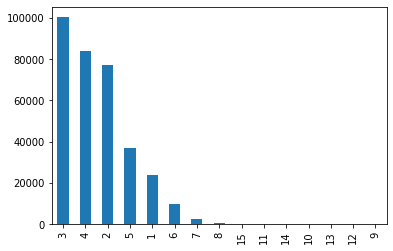

In [89]:
import matplotlib.pyplot as plt
base['topic_a_mano'].value_counts().plot(kind='bar')

In [110]:
portopic=(base['reglas y procedemientos'].sum(),
base['Administración'].sum(),
base['Economía'].sum(),
base['Energía'].sum(),
base['Seguridad'].sum(),
base['Política Laboral'].sum(),
base['Transporte'].sum(),
base['Comunicaciones'].sum(),
base['Social'].sum(),
base['Educación'].sum(),
base['Seguridad Social'].sum(),
base['Justicia'].sum(),
base['Internacionales'].sum(),
base['Política Interna'].sum(),
base['Otros'].sum())

nombres=['reglas y procedemientos', 'Administración', 'Economía', 'Energía', 'Seguridad', 'Política Laboral', 'Transporte', 'Comunicaciones', 'Social', 'Educación', 'Seguridad Social', 'Justicia', 'Internacionales', 'Política Interna', 'Otros']

<BarContainer object of 15 artists>

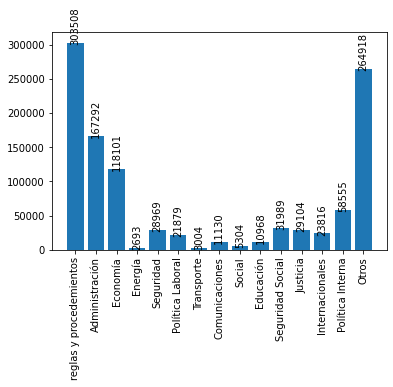

In [120]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], rotation='vertical', horizontalalignment='center')
        

plt.xticks(rotation='vertical')
addlabels(nombres, portopic)
plt.bar(nombres, portopic)